### Asignación

[Articulo Referencia](https://www.researchgate.net/publication/262457253_Development_and_validation_of_a_diagrammatic_scale_to_evaluate_cercospora_leaf_spot_in_watermelon/figures?lo=1)

1. Generar unos datos de la dostribución log-normal, con un promedio de daño del **8%** y una desviación estandar de **3.6** (si algún valor es negativo se convierte a 0)
2. Extraer media, mediana, quartiles y percentiles (desde 5% hasta 95% cada 5)
3. Categorizar la variable según la escala diagramtica del *articulo referencia*
4. En que posición de debo ubicarme en la escala para estimar la severidad real

1. Generar unos datos de la dostribución log-normal, con un promedio de daño del **8%** y una desviación estandar de **3.6** (si algún valor es negativo se convierte a 0)

In [197]:
#Los datos generados deben estar entre 0 y 1 para este caso, hay que truncarlos
mu=0.08
sigma=3.6
np.random.seed(2505)
while True:
   
   if i == 0:
       V = np.round(np.random.lognormal(mu, sigma, 30),2)
   V_outRange = (V > 1) + 0.
   V_good = (V < 1) + 0.
   V_ok = np.multiply(V, V_good)
   V_next = np.round(np.multiply(V_outRange, np.random.lognormal(mu, sigma, 30)),2)
   cerc_dmg = V_ok + V_next
   if (np.count_nonzero(V > 1)) == 0:
       break
   i += 1
cerc_dmg

array([0.08, 0.32, 0.02, 0.03, 0.44, 0.  , 0.13, 0.05, 0.  , 0.81, 0.  ,
       0.95, 0.  , 0.38, 0.01, 0.  , 0.85, 0.01, 0.02, 0.01, 0.98, 0.42,
       0.03, 0.22, 0.09, 0.03, 0.01, 0.13, 0.  , 0.44])

In [198]:
#Este seria el caso sin truncar, como se observa, hay datos que se salen del rango que se necesita
import pandas as pd
import numpy as np
np.random.seed(2505)
cerc_dmg2 = np.random.lognormal(0.08,3.6, 30)
cerc_dmg2

array([1.53495285e+02, 3.16661445e-01, 2.49207232e-02, 4.17497820e+00,
       4.44980589e-01, 7.55289477e+00, 1.31394932e-01, 4.18702473e+01,
       2.57198962e+00, 6.06024532e+00, 1.00277876e+00, 7.04867936e+01,
       3.34942734e-03, 3.82639807e-01, 1.11587267e-02, 1.06876434e-03,
       8.47716772e-01, 1.41241585e-02, 2.08027946e-02, 1.44574690e-02,
       3.63382802e+01, 1.25714537e+01, 1.36867772e+00, 4.58456372e+00,
       9.13393555e-02, 3.24655985e-02, 4.42708808e+00, 2.85374979e+01,
       9.95451218e-01, 4.36131091e-01])

2. Extraer media, mediana, quartiles y percentiles (desde 5% hasta 95% cada 5)

In [199]:
np.mean(cerc_dmg) ##media

0.21533333333333332

In [200]:
np.median(cerc_dmg) ##mediana

0.04

In [201]:
cerc_dmg.max()

0.98

In [202]:
cerc_dmg.min()

0.0

In [203]:
cerc_dmg_serie = pd.Series(cerc_dmg)
cerc_dmg_serie.quantile([0.05, 0.10, 0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.97])

0.05    0.0000
0.10    0.0000
0.15    0.0000
0.20    0.0080
0.25    0.0100
0.30    0.0100
0.35    0.0200
0.40    0.0260
0.45    0.0300
0.50    0.0400
0.55    0.0785
0.60    0.1060
0.65    0.1300
0.70    0.2500
0.75    0.3650
0.80    0.4240
0.85    0.4400
0.90    0.8140
0.95    0.9050
0.97    0.9539
dtype: float64

3. Categorizar la variable según la escala diagramtica del *articulo referencia*

In [204]:
cat_cerc = []
for pe_i in cerc_dmg:
  if(pe_i == 0):
    cat_cerc.append('0%')
  elif(pe_i >0 and pe_i <= 0.02):
    cat_cerc.append('2%')
  elif(pe_i <= 0.04):
    cat_cerc.append('4%')
  elif(pe_i <= 0.08):
    cat_cerc.append('8%')
  elif(pe_i <= 0.12):
    cat_cerc.append('12%')
  elif(pe_i <= 0.27):
    cat_cerc.append('27%')
  elif(pe_i <= 0.45):
    cat_cerc.append('45%')
  elif(pe_i <= 0.71):
    cat_cerc.append('71%')
  elif(pe_i <= 0.93 and pe_i <1):
    cat_cerc.append('93%')

cat_cerc_serie = pd.Series(cat_cerc)

In [205]:
cat_cerc_serie.describe()

count     28
unique     8
top       2%
freq       6
dtype: object

In [206]:
cat_cerc_serie.value_counts()

2%     6
0%     6
45%    5
4%     3
27%    3
8%     2
93%    2
12%    1
dtype: int64

4. En que posición de debo ubicarme en la escala para estimar la severidad real

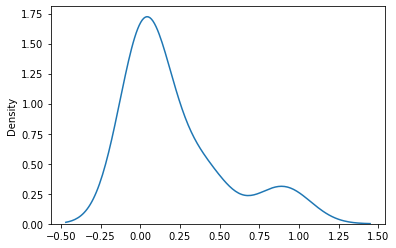

In [207]:
import seaborn as sns
sns.kdeplot(cerc_dmg) ##Solo por suavizado se ve negativo, pero no hay valores negativos

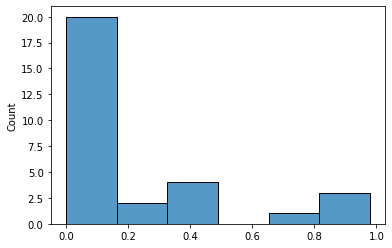

In [208]:
sns.histplot(cerc_dmg)

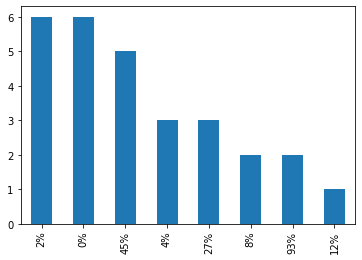

In [209]:
cat_cerc_serie.value_counts().plot(kind='bar') ### https://seaborn.pydata.org/generated/seaborn.barplot.html

In [210]:
np.mean(cerc_dmg) ##media de los datos sin categorizar

0.21533333333333332

In [211]:

cont = cat_cerc_serie.value_counts()
# Con el punto de corte real
frec1 = cont*[0, 2, 4, 8, 12, 27, 45, 93]
print(frec1.sum()/30)

# Con el punto medio
frec2 = cont*[0, 1, 3, 6, 10, 19.5, 36, 69]
print(frec2.sum()/30)

# Punto percentil 70%
frec3 = cont*[0, 1.4, 2.8, 5.6, 8.4, 18.9, 31.5, 65.1]
print(frec3.sum()/30)

# Punto percentil 5%
frec3 = cont*[0, 0.1, 0.2, 0.4, 0.6, 1.35, 2.25, 4.65]
print(frec3.sum()/30)

#Punto percentil 2%
frec4 = cont*[0, 0.04, 0.08, 0.16, 0.24, 0.54, 0.9, 1.86]
print(frec4.sum()/30)

10.966666666666667
8.3
7.676666666666666
0.5483333333333333
0.21933333333333332
